**Factor de Confusión (Confounder):** Es una variable que es una "causa común" tanto del tratamiento (X) como del resultado (Y). Crea una asociación falsa o espuria entre ellos. Si no se tiene en cuenta, puedes pensar erróneamente que X causa Y, cuando en realidad ambos son causados por Z.

**Colisionador (Collider):** Es una variable que es afectada por tanto el tratamiento (X) como el resultado (Y). Controlar o condicionar por un colisionador puede crear una asociación falsa entre X e Y, incluso si no existe un vínculo causal real entre ellos. Esto es una fuente importante de sesgo de selección.

**Mediador (Mediation):** Es una variable que se encuentra en la ruta causal entre el tratamiento (X) y el resultado (Y). Explica cómo o por qué X causa Y. El efecto de X sobre Y se transmite a través del mediador M.

ejemplos 1a

El nivel de actividad física (Z) es un factor de confusión. Las personas que hacen más ejercicio (Z) tienen más probabilidades de realizar actividades al aire libre, lo que aumenta su exposición al sol y, por lo tanto, sus niveles naturales de vitamina D (lo que puede llevar a tomar menos suplementos, o sesgar la muestra). Al mismo tiempo, el ejercicio físico (Z) reduce directamente el riesgo de enfermedades cardiovasculares (Y).

Llegar con vida al hospital (S) es un colisionador. Es afectado tanto por el tipo de herida (X) como por la supervivencia final (Y). Las heridas de bala suelen ser más letales inmediatamente; muchos de esos pacientes mueren en el lugar y nunca llegan al hospital (S). Los apuñalamientos pueden ser más lentos, permitiendo que personas más graves lleguen vivas (S) al hospital, donde luego pueden fallecer. Al condicionar solo a los pacientes que están en el hospital (S), se crea un sesgo donde parece que las heridas de bala tienen un mejor pronóstico, cuando en realidad la relación se ve distorsionada por los que no sobrevivieron para ser admitidos.

El Ibuprofeno (X) no "borra" el dolor mágicamente. Su efecto es mediado por un proceso bioquímico. El Ibuprofeno actúa inhibiendo la enzima ciclooxigenasa, lo que reduce la producción de prostaglandinas (M). Las prostaglandinas son sustancias químicas que promueven la inflamación y sensibilizan los receptores de dolor. Al reducir su producción (M), el Ibuprofeno logra reducir finalmente la sensación de dolor (Y).

In [3]:
using Pkg
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("LinearAlgebra")
Pkg.add("GLM")


    Updating registry at `C:\Users\giuli\.julia\registries\General.toml`
   Resolving package versions...
   Installed LoggingExtras ──────────────── v1.2.0
   Installed libfdk_aac_jll ─────────────── v2.0.4+0
   Installed JpegTurbo_jll ──────────────── v3.1.3+0
   Installed GR_jll ─────────────────────── v0.73.17+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed x265_jll ───────────────────── v4.1.0+0
   Installed Opus_jll ───────────────────── v1.5.2+0
   Installed Libmount_jll ───────────────── v2.41.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.7+0
   Installed Measures ───────────────────── v0.3.2
   Installed ConcurrentUtilities ────────── v2.5.0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Grisu ──────────────────────── v1.0.2
   Installed Contour ────────────────────── v0.6.3
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.2+0
   Installed PlotUtils ──────────────────── v1.4.3
   I

=== PARADOJA DE SIMPSON CON GLM ===
Grupo 1:  y = 2.04x + 79.8
Grupo 2:  y = 3.13x + 19.45
Combinado: y = 2.76x + 48.68


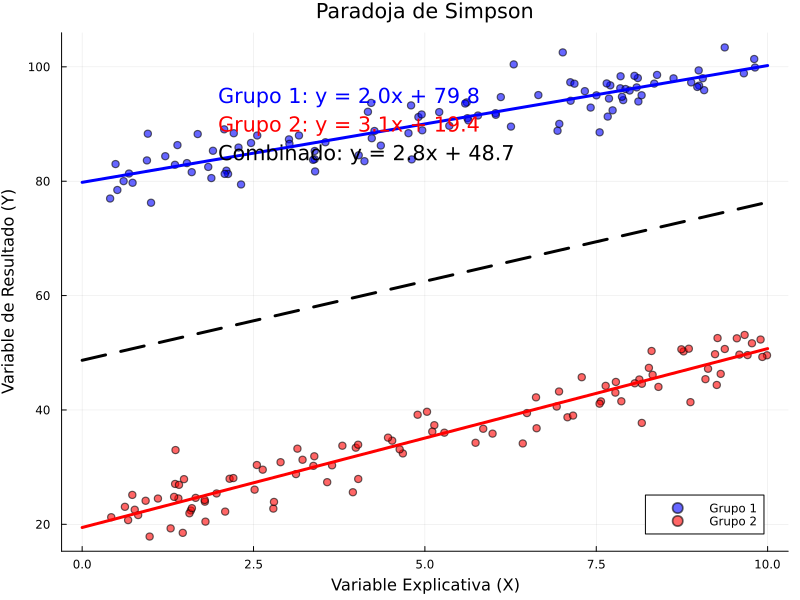

In [6]:
using Plots, DataFrames, GLM, Statistics


n = 100

x1 = rand(n) * 10
y1 = 2 * x1 .+ 80 .+ randn(n) * 3  
x2 = rand(n) * 10
y2 = 3 * x2 .+ 20 .+ randn(n) * 3

df = DataFrame(
    x = vcat(x1, x2),
    y = vcat(y1, y2),
    grupo = vcat(fill("Grupo 1", n), fill("Grupo 2", n))
)
modelo_g1 = lm(@formula(y ~ x), df[df.grupo .== "Grupo 1", :])
modelo_g2 = lm(@formula(y ~ x), df[df.grupo .== "Grupo 2", :])
modelo_comb = lm(@formula(y ~ x), df)

coef_g1 = coef(modelo_g1)
coef_g2 = coef(modelo_g2)
coef_comb = coef(modelo_comb)

println("=== PARADOJA DE SIMPSON CON GLM ===")
println("Grupo 1:  y = $(round(coef_g1[2], digits=2))x + $(round(coef_g1[1], digits=2))")
println("Grupo 2:  y = $(round(coef_g2[2], digits=2))x + $(round(coef_g2[1], digits=2))")
println("Combinado: y = $(round(coef_comb[2], digits=2))x + $(round(coef_comb[1], digits=2))")

p = plot(size=(800, 600))

scatter!(x1, y1, label="Grupo 1", color=:blue, alpha=0.6)
scatter!(x2, y2, label="Grupo 2", color=:red, alpha=0.6)

x_range = 0:0.1:10
plot!(x_range, coef_g1[1] .+ coef_g1[2] .* x_range, 
      label="", color=:blue, linewidth=3)
plot!(x_range, coef_g2[1] .+ coef_g2[2] .* x_range, 
      label="", color=:red, linewidth=3)
plot!(x_range, coef_comb[1] .+ coef_comb[2] .* x_range, 
      label="", color=:black, linewidth=3, linestyle=:dash)

annotate!(2, 95, text("Grupo 1: y = $(round(coef_g1[2], digits=1))x + $(round(coef_g1[1], digits=1))", :blue, :left))
annotate!(2, 90, text("Grupo 2: y = $(round(coef_g2[2], digits=1))x + $(round(coef_g2[1], digits=1))", :red, :left))
annotate!(2, 85, text("Combinado: y = $(round(coef_comb[2], digits=1))x + $(round(coef_comb[1], digits=1))", :black, :left))

xlabel!("Variable Explicativa (X)")
ylabel!("Variable de Resultado (Y)")
title!("Paradoja de Simpson")

Dentro de cada grupo: Ambas líneas azul y roja tienen pendiente positiva

En el Grupo 1, cuando X aumenta, Y también aumenta

En el Grupo 2, cuando X aumenta, Y también aumenta (incluso más rápido)

Cuando se combinan: La línea negra discontinua tiene pendiente negativa

Parece que cuando X aumenta, Y disminuye

entonces:

El Grupo 1 tiene valores Y generalmente más altos pero valores X más bajos

El Grupo 2 tiene valores Y generalmente más bajos pero valores X más altos

La diferencia entre grupos domina la relación dentro de cada grupo